<a href="https://colab.research.google.com/github/HVTrieuDuong/HOC-MAY/blob/main/MachineLearningRandomForest(food).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import các thư viện cần dùng
import numpy as np# import numpy
import matplotlib.pyplot as plt #import matplotlib.pylot
import glob#import glob
import cv2#import cv2
from keras.models import Model, Sequential# import Model, Sequential từ thư viện Keras.models
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization# import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization từ thư viện keras.layers
import os#import os
import seaborn as sns #Import seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.listdir("/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN"))

['train', 'validation']


In [ ]:
train_images=[]  #dùng để lưu trữ các hình ảnh huấn luyện
train_labels=[]  #dùng để lưu trữ các nhãn tương ứng của các hình ảnh
for directory_path in glob.glob("/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/*"):  
  label=directory_path.split("/")[-1]  #tách tên nhãn
  print(label)
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")): #tìm kiếm tất cả các tệp tin có đuôi jpg và lưu vào biến img_path.
    print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Đọc hình ảnh
    img = cv2.resize(img,(128,128))  #resize về kích thước (128, 128)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Hình ảnh cũng được chuyển đổi từ không gian màu RGB sang BGR
    train_images.append(img)
    train_labels.append(label)

Banh pia
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (61).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (50).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (72).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (109).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (108).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (107).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (105).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (106).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (104).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/train/Banh pia/1 (103).jpg
/content/drive/MyDrive/HCMUTE Cơ-điện tư

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/Data5FoodVN/validation*"):
  flower_label=directory_path.split("\\")[-1]
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img,(128,128))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(flower_label)
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
x_train = x_train / 255.0   #chuẩn hóa giá trị của chúng trong khoảng từ 0 đến 1.
x_test = x_test / 255.0

In [ ]:
from keras.utils import to_categorical
num_classes=5
y_train_one_hot = to_categorical(y_train,num_classes=5) #chuyển đổi nhãn y_train thành dạng one-hot encoding với num_classes=5.
y_test_one_hot = to_categorical(y_test,num_classes=5) #tương tự trên

In [ ]:
from keras.layers import Activation

activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', input_shape=(128,128,3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [ ]:
x = feature_extractor.output
x = Dense(128, activation=activation, kernel_initializer='he_uniform')(x)
prediction_layer = Dense(num_classes, activation='softmax')(x)

In [ ]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 128, 128, 3)]    0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_9 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0   

In [ ]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=10, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
18/18 [==============================] - 63s 4s/step - loss: 0.5971 - accuracy: 0.8055
Epoch 2/10
18/18 [==============================] - 64s 3s/step - loss: 0.5064 - accuracy: 0.8200
Epoch 3/10
18/18 [==============================] - 62s 3s/step - loss: 0.4701 - accuracy: 0.8400
Epoch 4/10
18/18 [==============================] - 64s 4s/step - loss: 0.4384 - accuracy: 0.8636
Epoch 5/10
18/18 [==============================] - 63s 4s/step - loss: 0.4148 - accuracy: 0.8673
Epoch 6/10
18/18 [==============================] - 63s 3s/step - loss: 0.3877 - accuracy: 0.8745
Epoch 7/10
18/18 [==============================] - 64s 4s/step - loss: 0.3846 - accuracy: 0.8691
Epoch 8/10
18/18 [==============================] - 68s 4s/step - loss: 0.3342 - accuracy: 0.9036
Epoch 9/10
18/18 [==============================] - 66s 4s/step - loss: 0.3025 - accuracy: 0.9073
Epoch 10/10
18/18 [==============================] - 64s 4s/step - loss: 0.2792 - accuracy: 0.9073


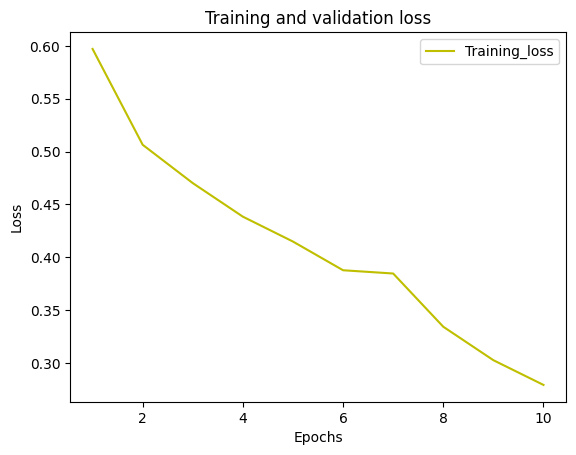

In [ ]:
#module matplotlib.pyplot (import as plt) để vẽ đồ thị biểu diễn giá trị hàm mất mát (loss) của quá trình huấn luyện và kiểm tra
loss = history.history['loss'] #loss đại diện cho giá trị hàm mất mát trong quá trình huấn luyện
val_loss = history.history.get('val_loss')  #val_loss đại diện cho giá trị hàm mất mát trong quá trình kiểm tra
epochs = range(1, len(loss) + 1) #để đại diện cho các epoch (vòng lặp huấn luyện) từ 1 đến số lượng phần tử trong danh sách loss.
plt.plot(epochs, loss, 'y', label='Training_loss') #vẽ đường cong biểu diễn giá trị hàm mất mát trong quá trình huấn luyện
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() #được gọi để hiển thị đồ thị biểu diễn

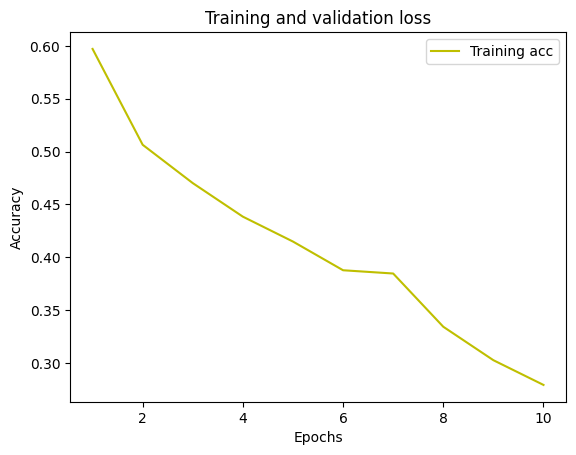

In [ ]:
acc= history.history['loss']
val_acc = history.history.get('val_acc') # Use .get() to avoid the error if 'testhoa_loss' is not present
plt.plot(epochs, acc, 'y', label='Training acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction_NN =  cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix 

print(cm)
sns.heatmap(cm, annot=True)

NameError: ignored

ValueError: ignored

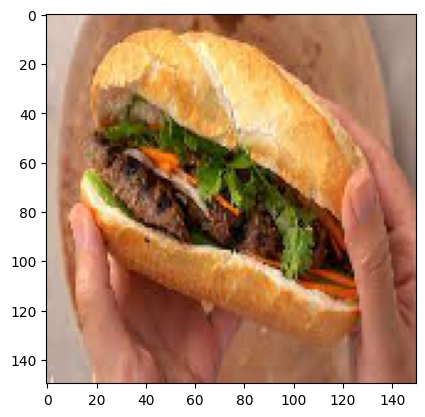

In [ ]:
n=0  #được khởi tạo với giá trị 0, có thể được sử dụng để chỉ định vị trí hình ảnh trong danh sách test_labels
img=load_img('/content/drive/MyDrive/Test/test3.jpg',target_size=(150,150))
plt.imshow(img) 
input_img = np.expand_dims(img, axis=0)  #np.expand_dims để mở rộng chiều của hình ảnh để phù hợp với yêu cầu đầu vào của mô hình
prediction = np.argmax(cnn_model.predict(img))  #np.argmax để xác định nhãn dự đoán
prediction = le.inverse_transform([prediction]) #le.inverse_transform dự đoán nhãn được định dạng
print("The predictin of this image is:", prediction)
print("The predictin of this image is:", test_labels[n])